In [3]:
import numpy as np
from typing import Union
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
def generate_data(year_list: Union[range, list]):
    if isinstance(year_list, range):
        year_list = list(year_list)

    ret = None
    for i in year_list:
        data = dict(np.load(f'{i}.npz'))
        n_frame = data[next(iter(data))].shape[0]
        data['day_of_year'] = np.arange(n_frame) // 24 + 1
        data['time_of_day'] = np.arange(n_frame) % 24
        if ret is None:
            ret = data
        else:
            for key in ret.keys():
                ret[key] = np.concatenate((ret[key], data[key]), axis=0)
    return ret

In [8]:
# year_list = ['./2014B_data/2016', './2014B_data/2017']
year_list = [f"./2014B_data/{year}" for year in range(1980, 1989)]
ret = generate_data(year_list)
land_sea_mask = ret['land_sea_mask']

# 海拔
orography = ret['orography']

# 纬度
lattitude = ret['lattitude']

# 地表2米高温度
_2m_temperature = ret['2m_temperature']

# 地表10米高风速u分量
_10m_u_component_of_wind = ret['10m_u_component_of_wind']

# 地表10米高风速v分量
_10m_v_component_of_wind = ret['10m_v_component_of_wind']

# 压强为1000百帕位势高度
geopotential_1000 = ret['geopotential_1000']

# 压强为1000百帕相对湿度
relative_humidity_1000 = ret['relative_humidity_1000']
# ret.keys()
relative_humidity_1000.shape


(78840, 1, 32, 64)

In [9]:
# 对比各个指标在一年内的变化趋势

def compare_inner_change(data, name):
    # 假设data是一个二维数组
    min_max_scaler = MinMaxScaler()
    # print(np.amax(data, axis=0).shape)
    data_max = np.amax(data, axis=0)
    data_min = np.amin(data, axis=0)
    data_mean = np.mean(data, axis=0)

    data_max = data_max.squeeze(0)
    data_min = data_min.squeeze(0)
    data_mean = data_mean.squeeze(0)

    # data_max = min_max_scaler.fit_transform(data_max)
    # data_min = min_max_scaler.fit_transform(data_min)

    plt.imshow(data_min, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Heatmap of 2D Data: {name}_min')
    plt.tight_layout()
    plt.show()

    # plt.subplot(1, 2, 1)
    # plt.imshow(data_max, cmap='hot', interpolation='nearest')
    # plt.colorbar()
    # plt.title(f'Heatmap of 2D Data: {name}_max')

    # plt.subplot(1, 2, 2)
    # plt.imshow(data_min, cmap='hot', interpolation='nearest')
    # plt.colorbar()
    # plt.title(f'Heatmap of 2D Data: {name}_min')
    # plt.tight_layout()
    # plt.show()

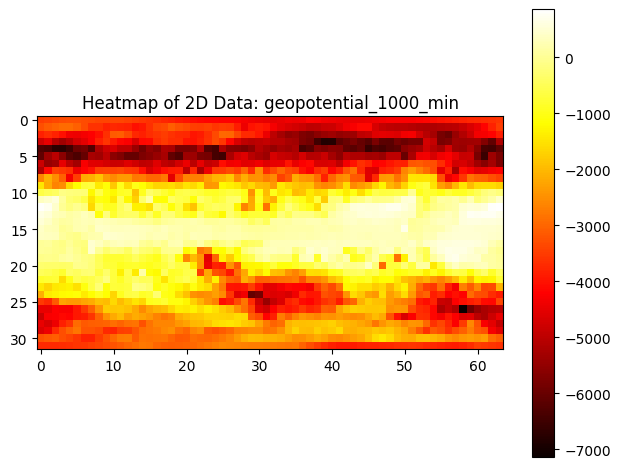

In [10]:
compare_inner_change(geopotential_1000, "geopotential_1000")
# compare_inner_change(_10m_u_component_of_wind, "_10m_u_component_of_wind")
# compare_inner_change(_10m_v_component_of_wind, "_10m_v_component_of_wind")
# compare_inner_change(_2m_temperature, "_2m_temperature")